## Random Forest
#### We start off with importing our libraries

In [12]:
import pandas as pandaforman                                                                                                  # this is for data manipulation
import numpy as numpyforops                                                                                                   # this is for numerical operations
import matplotlib.pyplot as mplforplotting                                                                                    # this is for plotting
from sklearn.model_selection import train_test_split                                                                          # this is the splitting of our data as well as training and testing the splits
from sklearn.ensemble import RandomForestClassifier                                                                           # this is the classifier we will be using
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay # These are important for the evaluation of our model

In [13]:
df = pandaforman.read_csv("../data/Cleaned_Churn_modelling.csv")
df.head()      #allows us a preview into our dataset 

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0
4,645,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0,0,1


#### Feature selection

In [14]:
X = df.drop(columns='Exited') #as this is our target variable, we will isolate it from the other variables
y = df['Exited']              #y will consist solely of our target variable

#### Training and testing our two sets of data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#this singular line of code simultaneously trains and tests both sets of data.
#the test size is set to a fifth (1/5, 0.2) of our total set to allow more in-depth training
#the random state has been set to 42 to maximise the randomeness in each node so our model learns, and does not remember

#### Implementing our model

In [16]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)#this is where we set a prediction of the outcome

#this is where we chech the accuracy score 
#the default number of decision trees in the random forest classifier is 10 hence the following statement

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8535


##### Our model has great accuracy but we will now attempt to push it to its limit.

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)#this is where we set a prediction of the outcome

#this is where we chech the accuracy score 
#the default number of decision trees in the random forest classifier is 10 hence the following statement

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8655


##### As expected, increasing the number of decision trees increased our accuracy. Let's attempt this once more.

In [18]:
rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)#this is where we set a prediction of the outcome

#this is where we chech the accuracy score 
#the default number of decision trees in the random forest classifier is 10 hence the following statement

print('Model accuracy score with 250 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 250 decision-trees : 0.8655


##### Increasing the number of trees beyond 100 does theoretically increase accuracy but as shown in the scores, the difference becomes marginal. For the purpose of efficiency, we will set our model to 100 trees.

### Evaluation of our model
##### We have chosen to make use of a confusion matrix and a classification report for the purpose of evaluating our model.

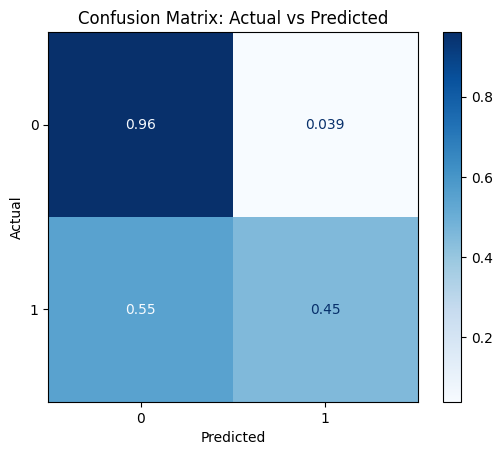

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1627
           1       0.72      0.45      0.56       373

    accuracy                           0.87      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.87      0.85      2000

Accuracy of the overall model: 0.87


In [19]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)                                                    #this is where we introduce our confusion matrix with calculations to contextualise each outcome in line with its counterpart with 1 being the negatives and 0 being the positives
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, numpyforops.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[0, 1,])
disp.plot(cmap=mplforplotting.cm.Blues)
mplforplotting.title("Confusion Matrix: Actual vs Predicted")
mplforplotting.xlabel("Predicted")
mplforplotting.ylabel("Actual")
mplforplotting.show()
print(classification_report(y_test, y_pred))                                              #this is where we introduce our classiicaton report
print(f"Accuracy of the overall model: {accuracy_score(y_test, y_pred):.2f}")

#### Feature importance
##### This will help use clearly identify the most important features in our dataset with regard to our target variable.

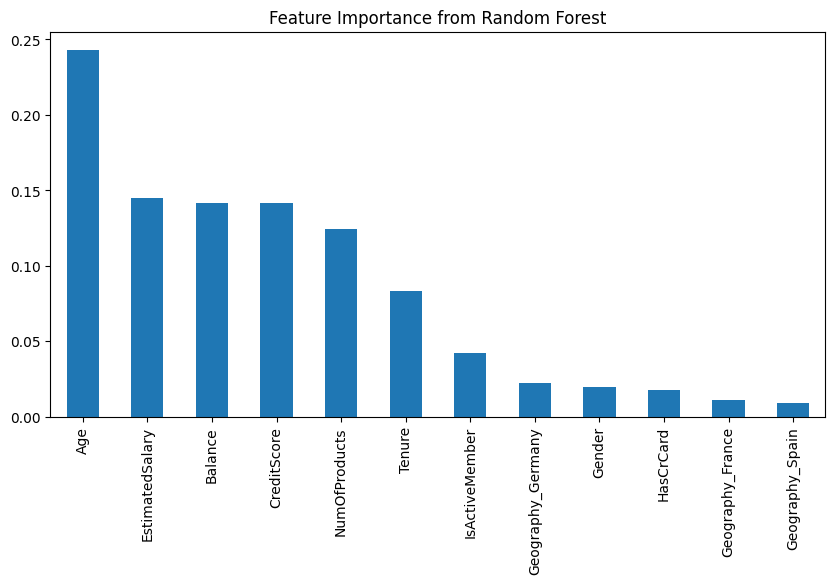

In [20]:
importances = pandaforman.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
mplforplotting.title('Feature Importance from Random Forest')
mplforplotting.show()

##### This shows us that the most important variable in predicting whether or not a customer wll churn is their age.

# Dump model to load on dash app

In [ ]:
import joblib

joblib.dump(rf, "random_forest.pkl")

['random_forest.pkl']